# Customer segmentation exploration

## Data

Our dataset comes from the online retail data set, which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail

In [1]:
#Import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from pandas import *
%matplotlib inline

In [2]:
#Loading data
df = pd.read_excel('../data/online_retail.xlsx', index_col=None)

In [3]:
#Head of our dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Cleaning

### Countries

In [4]:
#Which countries ?
print(df.Country.unique())
print(df.Country.nunique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


There are 38 different countries in this data set. 

Let's see how many customers for each of them :

In [5]:
#Drop duplicates
customer_country=df[['Country','CustomerID']].drop_duplicates()

#Sorting countries by number of customers
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',
                                                                                                 ascending=False).head()

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25


Our main customers are based in UK, for the following of our study we will only keep the ones form UK.

In [6]:
#Filtring customer to keep the UK ones
df = df[df['Country'] == 'United Kingdom']

### Missing values

In [7]:
#Number of missing values per columns
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

The purpose here is to analyse customers behavior based on their customers ID. All the lines where its missing are useless for us, hence we drop them : 

In [8]:
#Drop all missing values for customers ID
df = df[pd.notnull(df['CustomerID'])]

### Outliers

#### Overview 

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


##### Quantity

Quantity can't be negative :

In [78]:
df = df[df['Quantity']>0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219
std,190.428127,17.862067,1594.546025
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
df[df['Quantity']>300].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 181 to 540421
Data columns (total 8 columns):
InvoiceNo      727 non-null object
StockCode      727 non-null object
Description    727 non-null object
Quantity       727 non-null int64
InvoiceDate    727 non-null datetime64[ns]
UnitPrice      727 non-null float64
CustomerID     727 non-null float64
Country        727 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 51.1+ KB


In [79]:
df1 = df[df['Quantity']<300]

##### Price

Prices goes from 0 to 8142 pounds. Let's have a closer look to items which worth more than 300 and ones which worth 0 :

In [80]:
df1[(df1.UnitPrice>300)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
150615,549468,M,Manual,1,NaT,1867.86,17940.0,United Kingdom
153345,549739,M,Manual,1,NaT,308.82,15935.0,United Kingdom
171468,551419,M,Manual,1,NaT,400.00,12748.0,United Kingdom
173382,551697,POST,POSTAGE,1,NaT,8142.75,16029.0,United Kingdom
182482,552549,M,Manual,1,NaT,334.71,15674.0,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,NaT,649.50,15098.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,NaT,649.50,15098.0,United Kingdom
242907,558381,M,Manual,1,NaT,600.00,15299.0,United Kingdom
268399,560413,M,Manual,1,NaT,550.64,13564.0,United Kingdom
271252,560651,M,Manual,1,NaT,451.42,15802.0,United Kingdom


In [81]:
df1[(df1.UnitPrice==0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,NaT,0.0,16560.0,United Kingdom
47068,540372,22090,PAPER BUNTING RETROSPOT,24,NaT,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,NaT,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,NaT,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,NaT,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,NaT,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,NaT,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,NaT,0.0,14410.0,United Kingdom
187613,553000,47566,PARTY BUNTING,4,NaT,0.0,17667.0,United Kingdom
279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,NaT,0.0,16818.0,United Kingdom


In [82]:
#Keeping items whose prices are more than 0 pounds and less then 300.
df1 = df1[df1['UnitPrice']<300]
df1 = df1[df1['UnitPrice']>0]

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353474 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      353474 non-null object
StockCode      353474 non-null object
Description    353474 non-null object
Quantity       353474 non-null int64
InvoiceDate    353474 non-null datetime64[ns]
UnitPrice      353474 non-null float64
CustomerID     353474 non-null float64
Country        353474 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [84]:
def Group_Price(x):
    if x <= 2:
        return 2
    elif x <= 5:
        return 5
    elif x <= 10:
        return 10
    elif x <= 25:
        return 25
    elif x <= 50:
        return 50
    elif x <= 100:
        return 100
    elif x <= 300:
        return 300

In [85]:
#New column group price where price are grouped in intervals
df1['group_price'] = df1['UnitPrice'].apply(Group_Price)

#Feature which count the number of item in each interval of prices
price = df1['group_price'].value_counts()

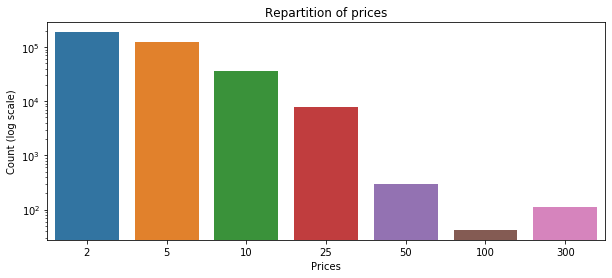

In [86]:
#Repartition of product by prices

fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(x = price.index , y = price)

ax.set_yscale('log')

plt.ylabel('Count (log scale)')
plt.xlabel('Prices')
plt.title('Repartition of prices')

plt.show()

# Feature engineering 

## Time

In [87]:
import datetime as dt
#The last date in our dataset
NOW = dt.datetime(2011,12,10)
#Transform the column invoice date into date time object
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [88]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,group_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5


In [89]:
df1['Month'] = [x.month for x in df1.InvoiceDate]
DateTable = df1.groupby('Month').agg({'Quantity': lambda x: x.sum(),'UnitPrice': lambda x: x.sum()})
DateTable

,Quantity,UnitPrice
Month,,
1,179668,56203.240
2,179321,54852.380
3,236746,72530.740
4,218251,61869.601
5,270486,78221.290
6,243411,70375.150
7,268869,63117.491
8,264196,63248.000
9,396567,98778.212


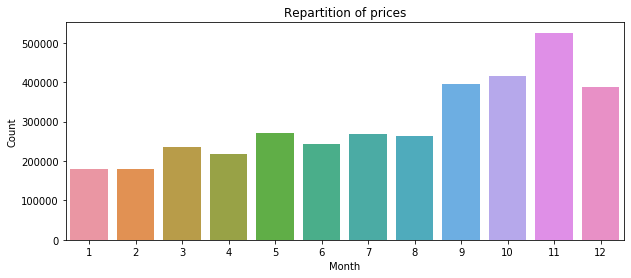

In [92]:
#Repartition of product by prices

fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(x = DateTable.index , y = DateTable.UnitPrice)
sns.barplot(x = DateTable.index , y = DateTable.Quantity)
#ax.set_yscale('log')

plt.ylabel('Count')
plt.xlabel('Month')
plt.title('Repartition of prices')

plt.show()

In [94]:
df1['Hour'] = [x.hour for x in df1.InvoiceDate]
DateTable = df1.groupby('Hour').agg({'Quantity': lambda x: x.sum(), 'UnitPrice': lambda x: x.sum()})
DateTable

,Quantity,UnitPrice
Hour,,
6,1,4.250
7,4559,859.850
8,91370,20341.730
9,273134,53014.711
10,451439,92745.411
11,450577,123516.930
12,606447,185308.070
13,516709,162603.780
14,437001,136667.271


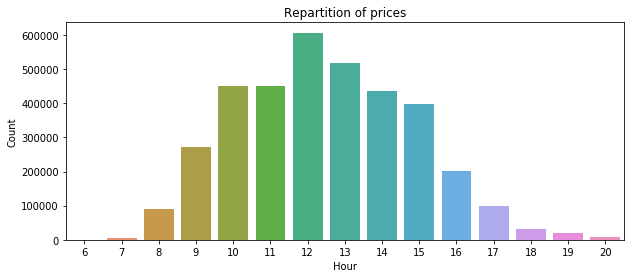

In [96]:
#Repartition of product by prices

fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(x = DateTable.index , y = DateTable.UnitPrice)
sns.barplot(x = DateTable.index , y = DateTable.Quantity)
#ax.set_yscale('log')

plt.ylabel('Count')
plt.xlabel('Hour')
plt.title('Repartition of prices')

plt.show()

In [97]:
def Group_Hour(x):
    if 6 <= x <= 8:
        return 6
    elif 9<= x <= 11:
        return 9
    elif 12 <= x <= 14:
        return 12
    elif 15 <= x <= 16:
        return 15
    elif 17 <= x <= 20:
        return 17

In [98]:
#New column group price where price are grouped in intervals
df1['GroupHour'] = df1['Hour'].apply(Group_Hour)

df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,group_price,Month,Hour,GroupHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5,12,8,6
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,12,8,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5,12,8,6
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,12,8,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,12,8,6


### RFM segmentation

In [99]:
#New feature total price
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']

In [100]:
import datetime as dt
#The last date in our dataset
NOW = dt.datetime(2011,12,10)
#Transform the column invoice date into date time object
df['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [120]:
customer1 = df[df.CustomerID == 17850]
customer1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
47,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom


In [119]:
test = [len(x) for x in customer1.InvoiceNo ]
test

TypeError: object of type 'int' has no len()

In [101]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,group_price,Month,Hour,GroupHour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5,12,8,6,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,12,8,6,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5,12,8,6,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,12,8,6,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,12,8,6,20.34


In [102]:
rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 
                                         'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)

In [103]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12747.0,2,103,4196.01
12748.0,0,4590,31961.03
12749.0,3,199,4090.88
12820.0,3,59,942.34
12821.0,214,6,92.72


In [104]:
segmented_rfm = rfmTable

In [105]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [106]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [107]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12747.0,2,103,4196.01,1,1,1
12748.0,0,4590,31961.03,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2
12821.0,214,6,92.72,4,4,4


In [108]:
segmented_rfm['rfm_score'] = round(segmented_rfm[['r_quartile', 'f_quartile','m_quartile']].mean(axis=1),2)
segmented_rfm.sample(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score
CustomerID,,,,,,,
14540.0,9,76,996.26,1,2,2,1.67
17284.0,60,292,1652.58,3,1,1,1.67
14920.0,212,57,977.77,4,2,2,2.67
16451.0,87,14,266.97,3,4,4,3.67
17879.0,173,6,178.52,4,4,4,4.00
15078.0,7,440,9743.11,1,1,1,1.00
15898.0,1,86,1388.88,1,2,2,1.67
14576.0,372,1,35.40,4,4,4,4.00
13748.0,95,28,948.25,3,3,2,2.67


In [109]:
segmented_rfm.describe()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,rfm_score
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,91.860769,90.634359,1623.585809,2.489744,2.514615,2.500000,2.501400
std,99.682007,218.088736,4578.842263,1.122252,1.125170,1.118177,0.943395
min,0.000000,1.000000,2.900000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,17.000000,294.850000,1.000000,2.000000,1.750000,1.670000
50%,50.000000,41.000000,640.450000,2.000000,3.000000,2.500000,2.670000
75%,143.000000,100.000000,1540.850000,3.000000,4.000000,3.250000,3.330000
max,373.000000,7847.000000,134415.520000,4.000000,4.000000,4.000000,4.000000


In [128]:
segmented_rfm[segmented_rfm.monetary_value > 4000].info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 163 entries, 12747.0 to 18229.0
Data columns (total 7 columns):
recency           163 non-null int64
frequency         163 non-null int64
monetary_value    163 non-null float64
r_quartile        163 non-null int64
f_quartile        163 non-null int64
m_quartile        163 non-null int64
rfm_score         163 non-null float64
dtypes: float64(2), int64(5)
memory usage: 10.2 KB


In [129]:
segmented_rfm = segmented_rfm[segmented_rfm.frequency < 300]
segmented_rfm = segmented_rfm[segmented_rfm.monetary_value < 4000]

In [130]:
segmented_rfm.to_csv('../data/rfm.csv', sep='\t', encoding='utf-8')